# Language Specific Subgraph And Cliques

##### 18BCE1302, 18BCE1309

For each programming language there's a tag in the network. E.g 'python' will refer to the python language. So we can check the cliques that contains that node. We can also visualize the subgraph containing that node and all its neighbors with a specifed depth range.

For example, we can check the ego network for java with radius 2, which means that we get the subgraph containing java and all it's direct neighbors which are 1 edge away from java and also the nodes which are 2 steps away from java.

These subgraphs called Ego networks and can be used for checking shortest paths or generally conducting analysis of who is connected to whom, but cliques are helpful because it shows us the data in a more granular way.


In [2]:
%matplotlib inline

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter
from networkx.algorithms import community

In [3]:
# Reading the datasets
G = nx.Graph()
df_nodes = pd.read_csv('datasets/stack_network_nodes.csv')
df_edges = pd.read_csv('datasets/stack_network_edges.csv')

# Adding edges and nodes from dataset to graph G
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['Source'], row['Target'], row['Weight'])])

In [4]:
# All direct neighbors of java which are 1 edge away and also the nodes which are 2 steps away from java
print(nx.ego_graph(G,'java',radius=2).nodes())

['embedded', 'qt', 'spring-mvc', 'web-services', 'python', 'ios', 'java-ee', 'hibernate', 'java', 'c++', 'rest', 'spring', 'spring-boot', 'android-studio', 'jsp', 'c', 'maven', 'android']


In [5]:
# All cliques containg java
nx.algorithms.clique.cliques_containing_node(G,"java")



[['c++', 'java', 'c'],
 ['spring', 'spring-mvc', 'hibernate', 'java', 'java-ee'],
 ['spring', 'spring-mvc', 'hibernate', 'java', 'jsp'],
 ['android', 'java']]

In [6]:
# All cliques containg python
nx.algorithms.clique.cliques_containing_node(G,"python")



[['python', 'flask', 'django'],
 ['python', 'machine-learning', 'r'],
 ['python', 'c++', 'c'],
 ['python', 'linux']]

In [7]:
# All cliques containg c++
nx.algorithms.clique.cliques_containing_node(G,"c++")



[['python', 'c++', 'c'], ['c++', 'qt'], ['c++', 'java', 'c']]

In [20]:
# All cliques in G, sorted
sorted_cliques = sorted(list(nx.find_cliques(G)),key=len)
sorted_cliques

[['photoshop', 'css'],
 ['testing', 'selenium'],
 ['docker', 'go'],
 ['python', 'linux'],
 ['rest', 'json'],
 ['rest', 'api'],
 ['regex', 'perl'],
 ['android-studio', 'android'],
 ['ionic-framework', 'angularjs'],
 ['eclipse', 'maven'],
 ['c++', 'qt'],
 ['matlab', 'r'],
 ['unity3d', 'c#'],
 ['unix', 'linux'],
 ['android', 'ios'],
 ['android', 'java'],
 ['drupal', 'wordpress'],
 ['cloud', 'amazon-web-services'],
 ['xml', 'json'],
 ['c', 'embedded'],
 ['vue.js', 'laravel'],
 ['scala', 'haskell'],
 ['tdd', 'agile'],
 ['jenkins', 'git'],
 ['jenkins', 'maven'],
 ['asp.net-web-api', 'angularjs'],
 ['azure', 'amazon-web-services'],
 ['apache', 'mysql'],
 ['angular', 'typescript'],
 ['nginx', 'redis'],
 ['typescript', 'angular2'],
 ['github', 'git'],
 ['windows', 'powershell'],
 ['postgresql', 'django'],
 ['linux', 'ubuntu'],
 ['mvc', 'asp.net'],
 ['c#', 'visual-studio'],
 ['c#', 'xamarin'],
 ['angular2', 'angularjs'],
 ['jquery', 'asp.net'],
 ['docker', 'devops', 'jenkins'],
 ['docker', 'devo

In [23]:
# Picking nodes from the 3 large cliques from the sorted list
max_clique_nodes = set()

for nodelist in sorted_cliques[-4:-1]:
    for node in nodelist:
        max_clique_nodes.add(node)

max_clique_nodes

{'.net',
 'asp.net',
 'c#',
 'css',
 'entity-framework',
 'html',
 'javascript',
 'jquery',
 'linq',
 'mysql',
 'php',
 'sql-server',
 'wcf',
 'wpf'}

In [22]:
# Forming a graph for the nodes in max_clique_nodes
max_clique = G.subgraph(max_clique_nodes)


In [24]:
print(nx.info(max_clique))



Name: 
Type: Graph
Number of nodes: 14
Number of edges: 43
Average degree:   6.1429


In [25]:
# color coded by groups
def draw_graph(G,size):
    nodes = G.nodes()
    color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}
    node_color= [color_map[d['group']] for n,d in G.nodes(data=True)]
    node_size = [d['nodesize']*10 for n,d in G.nodes(data=True)]
    pos = nx.drawing.spring_layout(G,k=0.80,iterations=60)
    plt.figure(figsize=size)
    nx.draw_networkx(G,pos=pos,node_color=node_color,node_size=node_size,edge_color='#FFDEA2')
    plt.show()

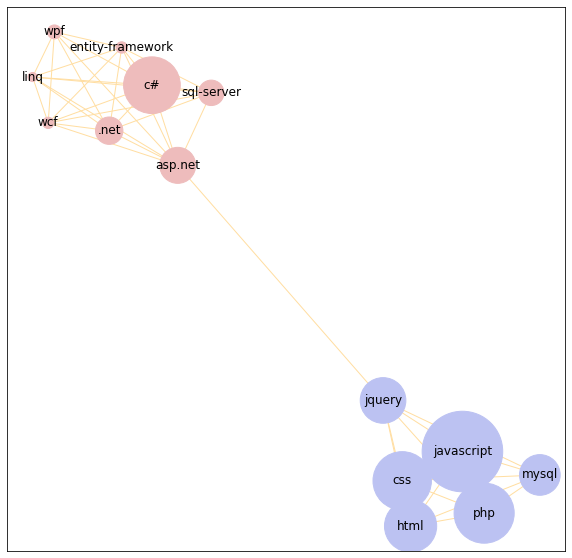

In [26]:
# relation between picked nodes
draw_graph(max_clique,size=(10,10))

# Homophily

Homophily or Assortativity measures the similarity of connections in the graph with respect to the node degree.

In [27]:
# Positive values of r indicate a correlation between nodes of similar degree
# Negative values indicate relationships between nodes of different degree
print("%.4f"% nx.degree_assortativity_coefficient(G))

0.1889


In [28]:
# Homophily with respect to nodesize attribute
print("%.4f"% nx.attribute_assortativity_coefficient(G,'nodesize'))

-0.0146
